In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.metrics import (accuracy_score, f1_score, confusion_matrix, classification_report,roc_auc_score, RocCurveDisplay)
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier



In [58]:
# Load dataset
df = pd.read_csv("heart.csv")

In [49]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [50]:
df.shape

(1025, 14)

In [51]:
print(df.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


In [52]:
#missing_values
df = pd.read_csv("heart.csv")
print("Dataset shape:", df.shape)
print("Missing values:\n", df.isnull().sum())

Dataset shape: (1025, 14)
Missing values:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


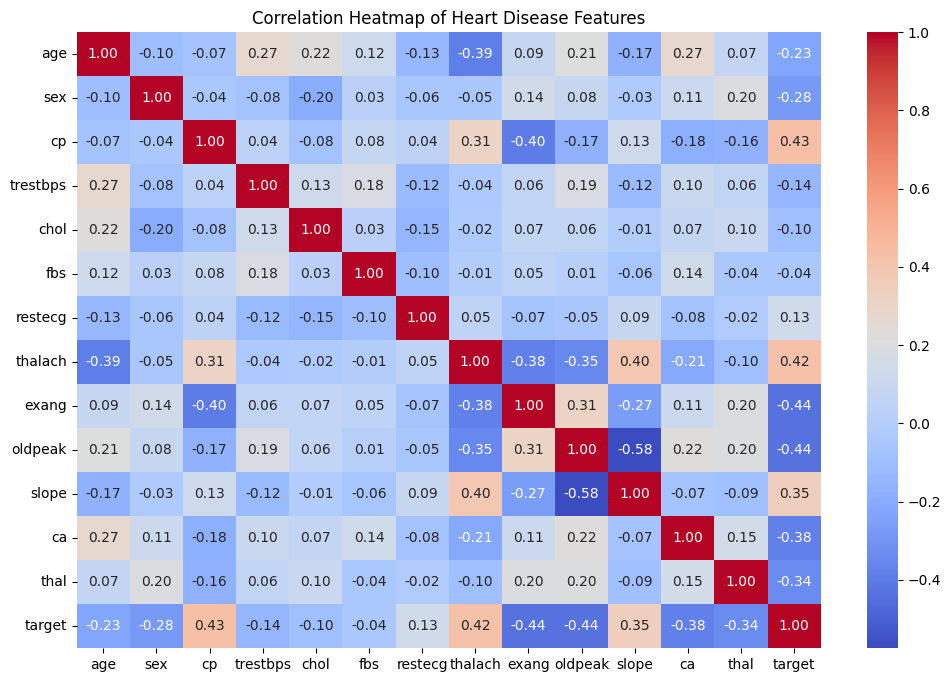

In [32]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap of Heart Disease Features")
plt.show()

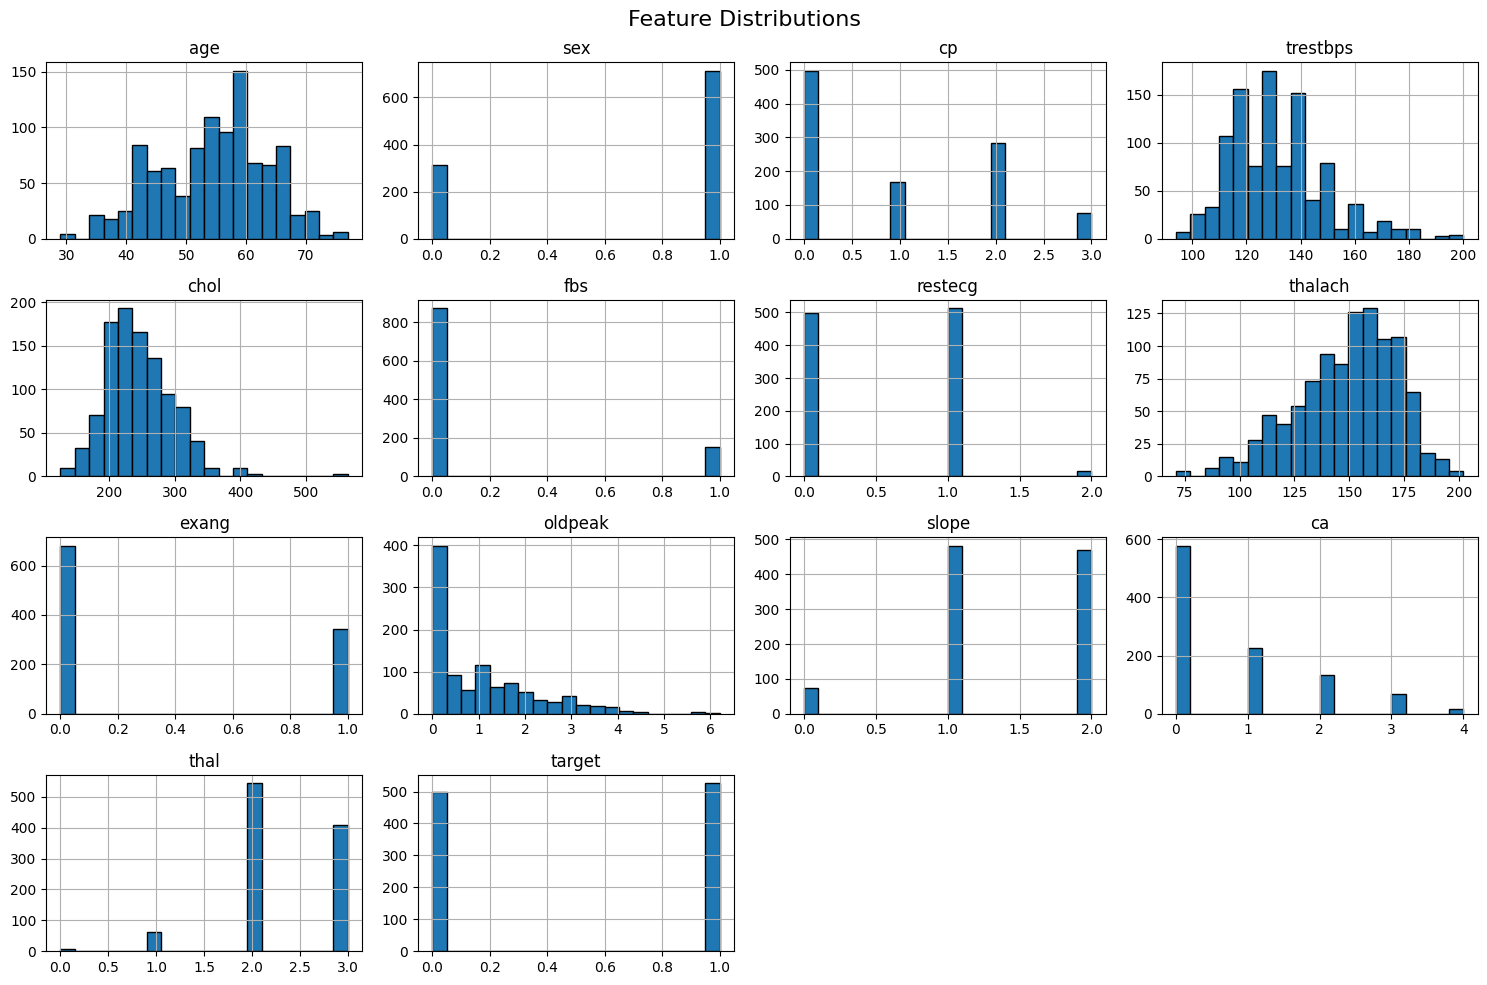

In [33]:
# Histograms
df.hist(figsize=(15, 10), bins=20, edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.tight_layout()
plt.show()

In [34]:
# === 4. Feature Scaling and Selection ===
X = df.drop("target", axis=1)
y = df["target"]

In [35]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



In [36]:
# Feature selection (proxy for Jellyfish Optimization)
selector = SelectKBest(score_func=mutual_info_classif, k=10)
X_selected = selector.fit_transform(X_scaled, y)
selected_features = X.columns[selector.get_support()].tolist()

print("Top 10 Selected Features:", selected_features)


Top 10 Selected Features: ['age', 'cp', 'trestbps', 'chol', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']


In [38]:
# === 5. Train-Test Split ===
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

In [54]:
# === 6. Define Models ===
models = {
    "SVM": SVC(probability=True),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    }

In [55]:
# === 7. Training and Evaluation ===
for name, model in models.items():
    print("=" * 60)
    print(f"Model: {name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

Model: SVM
Model: Decision Tree
Model: Random Forest
Model: AdaBoost
Model: Logistic Regression
Model: K-Nearest Neighbors


In [56]:
# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    print(f"\nModel: {name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("ROC AUC:", roc_auc_score(y_test, y_prob))
    print("Classification Report:\n", classification_report(y_test, y_pred))


Model: SVM
Accuracy: 0.8603896103896104
F1 Score: 0.8626198083067093
ROC AUC: 0.9403148875100249
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.82      0.86       159
           1       0.82      0.91      0.86       149

    accuracy                           0.86       308
   macro avg       0.86      0.86      0.86       308
weighted avg       0.86      0.86      0.86       308


Model: Decision Tree
Accuracy: 0.9707792207792207
F1 Score: 0.9688581314878892
ROC AUC: 0.9697986577181208
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       159
           1       1.00      0.94      0.97       149

    accuracy                           0.97       308
   macro avg       0.97      0.97      0.97       308
weighted avg       0.97      0.97      0.97       308


Model: Random Forest
Accuracy: 0.9902597402597403
F1 Score: 0.9898305084745763
ROC AUC: 0.9

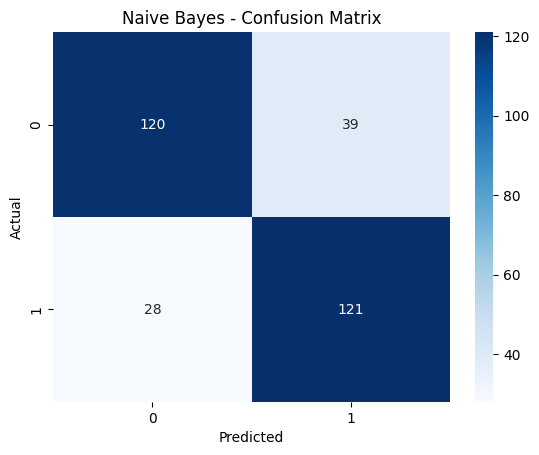

In [45]:
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

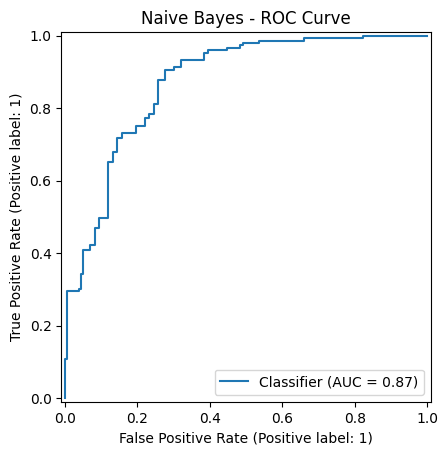

In [47]:
# ROC Curve
RocCurveDisplay.from_predictions(y_test, y_prob)
plt.title(f"{name} - ROC Curve")
plt.show()